In [1]:
#Imports
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image, display

In [2]:
#Creating state object
class Portfolio(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [3]:
#Functions
def calcTotal(state: Portfolio) -> Portfolio:
    state["total_usd"] = state["amount_usd"]*1.08
    return state

def calcINR(state: Portfolio) -> Portfolio:
    state["total_inr"] = state["total_usd"]*85
    return state
    

In [4]:
#Building langgraph graph
builder = StateGraph(Portfolio)

builder.add_node("Calculate USD", calcTotal)
builder.add_node("Calculate INR", calcINR)

builder.add_edge(START, "Calculate USD")
builder.add_edge("Calculate USD", "Calculate INR")
builder.add_edge("Calculate INR", END)

graph = builder.compile()

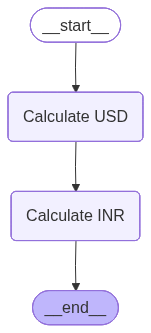

In [ ]:
#Graph display
display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}